In [ ]:
!pip install unidecode twython tweepy beautifulsoup4 tika

     |████████████████████████████████| 235 kB 5.0 MB/s 
  Created wheel for tika: filename=tika-1.24-py3-none-any.whl size=32891 sha256=e9afcad9eaa7f05ada441086cff68cb6cf00591e49f95079a810705cf687de0c
  Stored in directory: /root/.cache/pip/wheels/ec/2b/38/58ff05467a742e32f67f5d0de048fa046e764e2fbb25ac93f3
Successfully built tika


In [ ]:
import warnings; warnings.simplefilter('ignore')
import tweepy, json, nltk, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs

In [ ]:
# Contoh API Keys (Sesuaikan dengan API keys masing-masing)

Ck = 'zZ0CKaylFTgYxiLT3sgP2XK3k' # consumer_key
Cs = 'QfeNKlQHfGItzcHtSlKB0AfWT03LdBXKXpeWyPuHr1N1HkXwfX' # consumer_secret
At = '630229681-DKefsNZXg0FoZtLpFjTuAZyxPkojLINB7WXbMKCN' # access_token
As = 'RUP2Mk2xXq216QOYCEnr5qL3l0NvqpL9F7WWaWBk71lFd' # access_secret

'Done'

'Done'

In [ ]:
def connect(Ck, Cs, At, As):
    auth = tweepy.auth.OAuthHandler(Ck, Cs)
    auth.set_access_token(At, As)
    api = tweepy.API(auth)
    usr_ = api.verify_credentials()
    print('Welcome "{}" you are now connected to twitter server'.format(usr_.name))
    return api

In [ ]:
# Koneksi ke twitter
twt = connect(Ck, Cs, At, As)

Welcome "esteh" you are now connected to twitter server


In [ ]:
!pip install jsonpickle

**Crawling Data**

In [ ]:
import tweepy,sys,jsonpickle

qry='vaksin' #query yang akan di cari
maxTweets =  31000 # Isi sembarang nilai sesuai kebutuhan anda
tweetsPerQry = 100  # Jangan isi lebih dari 100, ndak boleh oleh Twitter
fName= 'vaksin.json' # Nama File hasil Crawling

auth = tweepy.AppAuthHandler(Ck, Cs)
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

if (not api):
    sys.exit('Autentikasi gagal, mohon cek "Consumer Key" & "Consumer Secret" Twitter anda')

sinceId, max_id, tweetCount = None, -1, 0

print("Mulai mengunduh {0} tweets".format(maxTweets))
with open(fName,'w') as f:
    while tweetCount < maxTweets:
        try:
            if (max_id <= 0):
                if (not sinceId):
                    new_tweets=api.search(q=qry,count=tweetsPerQry, lang = 'id')
                else:
                    new_tweets=api.search(q=qry,count=tweetsPerQry,lang = 'id',since_id=sinceId)
            else:
                if (not sinceId):
                    new_tweets=api.search(q=qry,count=tweetsPerQry,lang = 'id', max_id=str(max_id - 1))
                else:
                    new_tweets=api.search(q=qry,count=tweetsPerQry,lang = 'id', max_id=str(max_id - 1),since_id=sinceId)
            if not new_tweets:
                print('Tidak ada lagi Tweet ditemukan dengan Query="{0}"'.format(qry));break
            for tweet in new_tweets:
                f.write(jsonpickle.encode(tweet._json,unpicklable=False)+'\n')
            tweetCount+=len(new_tweets)
            sys.stdout.write("\r");sys.stdout.write("Jumlah Tweets telah tersimpan: %.0f" %tweetCount);sys.stdout.flush()
            max_id=new_tweets[-1].id
        except tweepy.TweepError as e:
            print("some error : " + str(e));break # Aya error, keluar
print ('\nSelesai! {0} tweets tersimpan di "{1}"'.format(tweetCount,fName))

Mulai mengunduh 31000 tweets
Jumlah Tweets telah tersimpan: 31067
Selesai! 31067 tweets tersimpan di "vaksin.json"


In [ ]:
import pandas as pd

with open('vaksin.json') as json_file:
    filee = pd.read_json(json_file, lines = True, orient='records')

print(filee)

                     created_at  ...  quoted_status
0     2021-10-30 00:37:23+00:00  ...            NaN
1     2021-10-30 00:37:22+00:00  ...            NaN
2     2021-10-30 00:37:20+00:00  ...            NaN
3     2021-10-30 00:37:15+00:00  ...            NaN
4     2021-10-30 00:37:12+00:00  ...            NaN
...                         ...  ...            ...
31062 2021-10-27 04:52:33+00:00  ...            NaN
31063 2021-10-27 04:52:25+00:00  ...            NaN
31064 2021-10-27 04:52:24+00:00  ...            NaN
31065 2021-10-27 04:52:22+00:00  ...            NaN
31066 2021-10-27 04:52:21+00:00  ...            NaN

[31067 rows x 30 columns]


In [ ]:
filee.keys()

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang',
       'possibly_sensitive', 'retweeted_status', 'extended_entities',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [ ]:
df = pd.DataFrame(filee)
df

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,retweeted_status,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status
0,2021-10-30 00:37:23+00:00,1454246018120228865,1454246018120228864,orang mah habis vaksin ada efek sampingnya lah...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,None,"{'id': 1334516544899084288, 'id_str': '1334516...",None,None,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-30 00:37:22+00:00,1454246011317022722,1454246011317022720,@Painkiller819 @darakasiwi @Adam108703801 @amy...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.454242e+18,1.454242e+18,1.442723e+18,1.442723e+18,Painkiller819,"{'id': 954680337665150976, 'id_str': '95468033...",None,None,None,NaN,False,0,0,False,False,in,0.0,NaN,NaN,NaN,NaN,NaN
2,2021-10-30 00:37:20+00:00,1454246004039979010,1454246004039979008,RT @JPenerangan: 95 penduduk dewasa dan 62 per...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1074540577050378240, 'id_str': '1074540...",None,None,None,NaN,False,165,0,False,False,in,NaN,{'created_at': 'Fri Oct 29 09:13:52 +0000 2021...,NaN,NaN,NaN,NaN
3,2021-10-30 00:37:15+00:00,1454245984645513218,1454245984645513216,klo hanya untuk memperkaya segelintir orang to...,False,"{'hashtags': [{'text': 'StopWajibPCR', 'indice...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1330905287734116352, 'id_str': '1330905...",None,None,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-10-30 00:37:12+00:00,1454245969357246467,1454245969357246464,Terbukti vaksin aman dan teruji Jokowi Preside...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1356566512690057216, 'id_str': '1356566...",None,None,None,NaN,False,0,0,False,False,in,0.0,NaN,"{'media': [{'id': 1454245962218553346, 'id_str...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31062,2021-10-27 04:52:33+00:00,1453223065458987009,1453223065458987008,"RT @FKadrun: PPKM Udah, Prokes Udah, 6M Udah, ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1118065269484560384, 'id_str': '1118065...",None,None,None,NaN,False,371,0,False,False,in,NaN,{'created_at': 'Tue Oct 26 12:16:53 +0000 2021...,NaN,NaN,NaN,NaN
31063,2021-10-27 04:52:25+00:00,1453223033947181064,1453223033947181056,@nanadoongifess Wow so sekseh😭😭😭\n\nMaju sini ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.453222e+18,1.453222e+18,1.237360e+18,1.237360e+18,nanadoongifess,"{'id': 1234786860406210562, 'id_str': '1234786...",None,None,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
31064,2021-10-27 04:52:24+00:00,1453223028926689289,1453223028926689280,@BobbyTauran @e100ss untuk dosis ke-2 bisa ke ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel="

In [ ]:
df[['id','user']]

,id,user
0,1454246018120228865,"{'id': 1334516544899084288, 'id_str': '1334516..."
1,1454246011317022722,"{'id': 954680337665150976, 'id_str': '95468033..."
2,1454246004039979010,"{'id': 1074540577050378240, 'id_str': '1074540..."
3,1454245984645513218,"{'id': 1330905287734116352, 'id_str': '1330905..."
4,1454245969357246467,"{'id': 1356566512690057216, 'id_str': '1356566..."
...,...,...
31062,1453223065458987009,"{'id': 1118065269484560384, 'id_str': '1118065..."
31063,1453223033947181064,"{'id': 1234786860406210562, 'id_str': '1234786..."
31064,1453223028926689289,"{'id': 1261522978921000960, 'id_str': '1261522..."
31065,1453223021871722496,"{'id': 1272853334123089920, 'id_str': '1272853..."


In [ ]:
df['user'][10]

{'contributors_enabled': False,
 'created_at': 'Tue Aug 03 10:11:25 +0000 2021',
 'default_profile': True,
 'default_profile_image': False,
 'description': '📓#studytwt',
 'entities': {'description': {'urls': []},
  'url': {'urls': [{'display_url': 'shadowban.eu/_O5KY02',
     'expanded_url': 'https://shadowban.eu/_O5KY02',
     'indices': [0, 23],
     'url': 'https://t.co/cKee747ooM'}]}},
 'favourites_count': 12521,
 'follow_request_sent': None,
 'followers_count': 840,
 'following': None,
 'friends_count': 730,
 'geo_enabled': False,
 'has_extended_profile': True,
 'id': 1422500318751821826,
 'id_str': '1422500318751821826',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': None,
 'listed_count': 31,
 'location': 'saintek²³',
 'name': 'kay',
 'notifications': None,
 'profile_background_color': 'F5F8FA',
 'profile_background_image_url': None,
 'profile_background_image_url_https': None,
 'profile_background_tile': False,
 'profile_banner_url': 'https://pbs.twimg.com/

In [ ]:
from pandas.io.json import json_normalize

data = json_normalize(df['user'])
data

,id,id_str,name,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_banner_url,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries,entities.description.urls,entities.url.urls
0,1334516544899084288,1334516544899084288,ikantawar,teritawar,waterland,dive in the sky.,None,False,114,137,0,Thu Dec 03 15:15:21 +0000 2020,551,None,None,False,False,2092,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1364377085...,https://pbs.twimg.com/profile_images/136437708...,https://pbs.twimg.com/profile_banners/13345165...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,None,None,None,none,[],[],NaN
1,954680337665150976,954680337665150976,Titiek titiek,Titiektitiek2,,,None,False,443,655,0,Sat Jan 20 11:41:44 +0000 2018,47261,None,None,False,False,24496,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1430767557...,https://pbs.twimg.com/profile_images/143076755...,NaN,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,None,None,None,none,[],[],NaN
2,1074540577050378240,1074540577050378240,Pusat Maklumat Rakyat PPD Pasir Puteh,PMRPasirPuteh,"Pasir Puteh, Kelantan",Akaun rasmi Pejabat Penerangan Daerah Pasir Puteh,None,False,555,308,1,Mon Dec 17 05:43:32 +0000 2018,7314,None,None,False,False,23005,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1231749259...,https://pbs.twimg.com/profile_images/123174925...,https://pbs.twimg.com/profile_banners/10745405...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,None,None,None,none,[],[],NaN
3,1330905287734116352,1330905287734116352,Ravirzha,RavirzhaO,,be your self,None,False,19,221,0,Mon Nov 23 16:05:40 +0000 2020,1436,None,None,True,False,385,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1330905554...,https://pbs.twimg.com/profile_images/133090555...,NaN,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,None,None,None,none,[],[],NaN
4,1356566512690057216,1356566512690057216,danput,danput86,,,None,False,31,64,0,Tue Feb 02 11:34:09 +0000 2021,47,None,None,False,False,590,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1357158430...,https://pbs.twimg.com/profile_images/135715843...,NaN,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,None,None,None,none,[],[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31062,1118065269484560384,1118065269484560384,Gama de Lama..🇲🇨,Ichalsyahrizal1,,Kebenaran Memang Dapat Di Salahkan.. Tapi Sesu...,None,False,1515,1903,0,Tue Apr 16 08:15:07 +0000 2019,99242,None,None,False,False,65541,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1328142880...,https://pbs.twimg.com/profile_images/132814288...,https://pbs.twimg.com/profile_banners/11180652...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,None,None,None,none,[],[],NaN
31063,1234786860406210562,1234786860406210562,Dinut,dnltfa,Bumi,🌱,None,False,247,637,0,Tue Mar 03 10:25:44 +0000 2020,89971,None,None,False,False,4804,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1453685596...,https://pbs.twimg.com/profile_images/145368559...,https://pbs.twimg.com/profile_banners/12347868...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,None,None,None,none,[],[],NaN
31064,1261522978921000960,1261522978921000960,Toko

**Analisis Dasar**

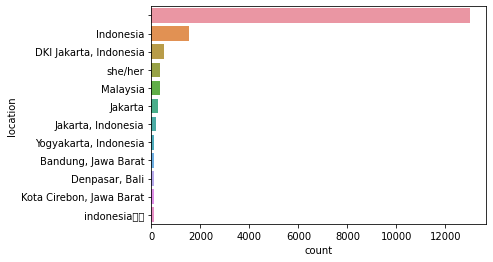

In [ ]:
import seaborn as sns

p = sns.countplot(y=data.location, order=pd.value_counts(data.location).iloc[:12].index)

In [ ]:
print('akun dengan followers terbanyak adalah ')
followers = data[['screen_name', 'followers_count']]
followers.sort_values(by=['followers_count'], ascending=False).head()

akun dengan followers terbanyak adalah 


,screen_name,followers_count
21851,detikcom,17160708
27150,detikcom,17160708
26070,detikcom,17160708
21305,detikcom,17160708
18291,detikcom,17160708


In [ ]:
print('tweet dengan like terbanyak adalah ')
likes = df[['text', 'favorite_count']]
likes.sort_values(by=['favorite_count'], ascending=False).head()

tweet dengan like terbanyak adalah 


,text,favorite_count
16809,Carina Citra Dewi Joe adalah ilmuwan Indonesia...,2470
24585,Sy bakal ada perjalanan ke LN. Sudah niatin ta...,698
9871,@zakisuhaidi710 @magmalaya Vaksin function ban...,638
15667,Bukan cuma kebanggaan Indonesia...tapi sdh jad...,496
15248,Kawal dan kurangkan makanan tinggi garam seper...,492


In [ ]:
print('tweet dengan retweet terbanyak adalah ')
retweet = df[['text', 'retweet_count']]
retweet.sort_values(by=['retweet_count'], ascending=False).head()

tweet dengan retweet terbanyak adalah 


,text,retweet_count
11390,"RT @khairul_hafidz: Buat antivaxx tegar,\n\nJa...",33804
12018,"RT @khairul_hafidz: Buat antivaxx tegar,\n\nJa...",33804
10573,"RT @khairul_hafidz: Buat antivaxx tegar,\n\nJa...",33804
10210,RT @azhar_za: Budak 8 tahun call no fon ppv ta...,31296
20039,RT @locomidulcecoco: Kemarin mikir ini kenapa ...,20331


In [ ]:
!pip install Sastrawi

     |████████████████████████████████| 209 kB 5.0 MB/s 


**Preprocessing**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
# %matplotlib inline
# pd.set_option('display.max_colwidth', 100)


#definisi dataframe
df  = df[['id_str','text']]


#remove user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt    
df['remove_user'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")

def remove(tweet):
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)
    
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    return tweet
df['remove_http'] = df['remove_user'].apply(lambda x: remove(x))
df.sort_values("remove_http", inplace = True)
df.drop_duplicates(subset ="remove_http", keep = 'first', inplace = True)

import nltk
nltk.download('stopwords')
 #import stopword
from nltk.corpus import stopwords 
stopwords_indonesia = stopwords.words('indonesian')
 
#import sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#tokenize
from nltk.tokenize import TweetTokenizer
 
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)
 
def clean_tweets(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
 
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    
    #remove coma
    tweet = re.sub(r',','',tweet)
    
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)
 
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords_indonesia and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
 
    return tweets_clean
df['tweet_clean'] = df['remove_http'].apply(lambda x: clean_tweets(x))

#remove punct
def remove_punct(text):
    text  = " ".join([char for char in text if char not in string.punctuation])
    return text
df['Tweet'] = df['tweet_clean'].apply(lambda x: remove_punct(x))
 
df.sort_values("Tweet", inplace = True)
df.drop(df.columns[[0,1,2,3,4]], axis = 1, inplace = True)
df.drop_duplicates(subset ="Tweet", keep = 'first', inplace = True)
df.to_json('output.json')
df



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Tweet
14362,
29703,a
24418,a bunch of well-known antivax on fb kumpul ram...
24046,a bunch of well-known antivax on fb kumpul ram...
3902,a vaksin iya s temenin s blm vaksin film marve...
...,...
12912,zoo sedih banget open adopt domestik x himalay...
27559,zoo temen-temen doa ya kucing malam tindak ste...
15254,zoom meet vaksin massal suara wa baca subhanallah
30611,zqscore beritabolaterkini calon kapten timnas ...


In [ ]:
cleanTweet=df['Tweet']

In [ ]:
with open('dataTweet.txt', 'w') as f:
    for d in cleanTweet:
        f.write(d+'\n')
'Done'

'Done'

**Interpretasi**

Berdasarkan output dari data yang kami olah, dapat disimpulkan bahwa vaksin selalu berkaitan dengan pemerintah, PCR, covid, dan masyarakat. Disini kami menemukan informasi baru, dimana terdapat vaksin covid-19 terbaru bernama vaksin Zifivax. dimana vaksin tersebut mendapat izin penggunaan darurat oleh BPOM. Vaksin ini dirilis pada 7 oktober 2021.
Untuk hasil pengkajian efikasi sementara data menerima uji klinis fase 3 menunjukkan efikasi yang baik dari vaksin covid-19 Zifivax, termasuk terhadap virus SAR COV-2 varian alfa (92,93%), gamma (100%), delta (77,47%) dan kappa (90%)
Efikasi vaksin covid-19 Zifivax mencapai 81,71% dihitung mulai 7 hari setelah mendapat vaksinasi lengkap.
Efek vaksin juga masih hangat dibicarakan, dimana setiap orang memiliki efek yang berbeda. efek yang pling sering dirasakan yaitu demam dan pegal di area bekas suntik.
Vaksin yang sering memberikan efek tersebut yaitu vaksin moderna. Vaksin moderna ini dijadikan vaksin booster (vaksin dosis ke-3) untuk yang vaksin dosis ke-1 dan ke-2 nya adalah vaksin sinovac.
Dari data yang kami peroleh juga, masyarakat mengeluhkan tentang minimnya informasi mengenai lokasi diselenggarakannya vaksinasi.